# Experiment 3

#### Problem Statement
Implement a basic state space search program in Python to solve the classic "Missionaries and Cannibals" puzzle. The goal is to implement a simple program that finds a sequence of valid moves to safely transport three missionaries and three cannibals across a river, following specific constraints.

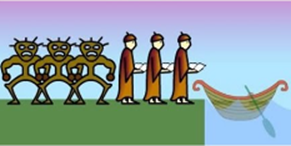

#### Code

##### Imports Needed

In [1]:
from collections import deque

##### Define the goal state

In [2]:
GOAL_STATE = (0, 0, 1)

##### Check if a state is valid

In [3]:

def is_valid_state(state):
    (ml, cl, b) = state
    mr = 3 - ml
    cr = 3 - cl
    # Ensure no negative counts and no count greater than 3
    if not (0 <= ml <= 3 and 0 <= cl <= 3 and 0 <= mr <= 3 and 0 <= cr <= 3):
        return False
    # Cannibals shouldn't outnumber missionaries on either bank
    if (ml < cl and ml != 0) or (mr < cr and mr != 0):
        return False
    return True

##### Generate possible next states

In [4]:
def generate_next_states(state):
    (ml, cl, boat) = state
    possible_moves = [(2, 0), (1, 0), (1, 1), (0, 1), (0, 2)]
    
    next_states = []
    
    for move in possible_moves:
        if boat == 0:
            next_state = (ml - move[0], cl - move[1], 1)
        else:
            next_state = (ml + move[0], cl + move[1], 0)
        
        if is_valid_state(next_state):
            next_states.append(next_state)
    
    return next_states

##### Breadth-First Search function

In [5]:
def bfs(initial_state):
    explored = set()
    queue = deque([(initial_state, [])]) 
    
    while queue:
        current_state, path = queue.popleft()
        
        if current_state == GOAL_STATE:
            return path + [current_state]
        
        explored.add(current_state)
        
        for next_state in generate_next_states(current_state):
            if next_state not in explored:
                queue.append((next_state, path + [current_state]))
    
    return None


##### Solve the puzzle

In [6]:
# Solve the puzzle
initial_state = (3, 3, 0)
solution_path = bfs(initial_state)

if solution_path:
    print("Solution Path:")
    for state in solution_path:
        print(state)
else:
    print("No solution found.")

Solution Path:
(3, 3, 0)
(2, 2, 1)
(3, 2, 0)
(3, 0, 1)
(3, 1, 0)
(1, 1, 1)
(2, 2, 0)
(0, 2, 1)
(0, 3, 0)
(0, 1, 1)
(1, 1, 0)
(0, 0, 1)
